# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient


load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\youss\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv('news_api_key')

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key = api_key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(
    q= 'bitcoin', 
    language= 'en', 
    page_size = 100, 
    sort_by = 'relevancy')

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(
    q = 'ethereum', 
    language = 'en', 
    page_size = 100, 
    sort_by = 'relevancy'
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []
for article in bitcoin_headlines['articles']: 
    try: 
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            'text':text, 
            'date': date, 
            'compound': compound, 
            'positive': pos, 
            'negative': neg, 
            'neutral' : neu
        })
    except AttributeError: 
        pass 
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]

bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944
1,2021-02-12,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.032,0.916
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
3,2021-03-03,,0.0000,0.000,0.000,0.000
4,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860


In [8]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!bitcoin_sentiments = []
eth_sentiment = []
for article in eth_headlines['articles']: 
    try: 
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        eth_sentiment.append({
            'text':text, 
            'date': date, 
            'compound': compound, 
            'positive': pos, 
            'negative': neg, 
            'neutral' : neu
        })
    except AttributeError: 
        pass 

eth_df = pd.DataFrame(eth_sentiment)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]

eth_df = eth_df[cols]
eth_df.head()


,date,text,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856


In [85]:
bitcoin_df['positive'].mean(axis=0)


0.06138947368421052

In [94]:
bitcoin_df['compound'].max()


0.8519

In [ ]:
bitc

In [87]:
eth_df['positive'].mean(axis=0)

0.07165217391304349

In [95]:
eth_df['compound'].max()

0.8779

In [89]:
eth_df['negative'].mean(axis=0)

0.02503260869565218

In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

### Questions:

Q: Which coin had the highest mean positive score?

A: ETH 

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
regex = re.compile("[^a-zA-Z ]")

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    lem = []
    lower = []
    tokens_2 = []
    for article in text['articles']:
        
        text2 = article['content']
    
        # Remove the punctuation from text
        clean_text = regex.sub(' ', str(text2))



        # Create a tokenized list of the words
        words = word_tokenize(clean_text)

#         # Lemmatize words into root words
        lem_words = [lemmatizer.lemmatize(word) for word in words]
        lem.append(lem_words)


#         # Convert the words to lowercase
        lower_case = [word.lower() for word in lem_words]
        lower.append(lower_case)
#         # Remove the stop words
        tokens = [x for x in lower_case if x not in sw]
        tokens_2 = tokens_2 + tokens
    return tokens_2

In [14]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_tokens = tokenizer(bitcoin_headlines)

In [15]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_tokens = tokenizer(eth_headlines)


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_ngram = Counter(ngrams(bitcoin_tokens, n=2))
print(bitcoin_ngram)

Counter({('reuters', 'staff'): 37, ('file', 'photo'): 35, ('char', 'reuters'): 34, ('reuters', 'bitcoin'): 23, ('staff', 'file'): 16, ('virtual', 'currency'): 16, ('illustration', 'taken'): 15, ('record', 'high'): 12, ('feb', 'reuters'): 11, ('new', 'york'): 10, ('picture', 'illustration'): 10, ('photo', 'representation'): 10, ('currency', 'bitcoin'): 9, ('reuters', 'dado'): 9, ('dado', 'ruvic'): 9, ('new', 'record'): 9, ('representation', 'virtual'): 8, ('bitcoin', 'hit'): 8, ('bitcoin', 'seen'): 7, ('hit', 'new'): 7, ('time', 'high'): 6, ('photo', 'collection'): 6, ('collection', 'bitcoin'): 6, ('bitcoin', 'virtual'): 6, ('currency', 'token'): 6, ('token', 'displayed'): 6, ('displayed', 'picture'): 6, ('taken', 'dec'): 6, ('dec', 'reuters'): 6, ('reuters', 'benoit'): 6, ('benoit', 'tessier'): 6, ('tessier', 'illustration'): 6, ('ruvic', 'illustration'): 6, ('char', 'posted'): 6, ('staff', 'reuters'): 6, ('char', 'none'): 5, ('illustration', 'reuters'): 5, ('illustration', 'file'): 5,

In [18]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_ngram = Counter(ngrams(eth_tokens, n=2))
eth_ngram

Counter({('worried', 'geforce'): 1,
         ('geforce', 'rtx'): 1,
         ('rtx', 'sold'): 1,
         ('sold', 'cryptocurrency'): 1,
         ('cryptocurrency', 'miner'): 3,
         ('miner', 'snap'): 1,
         ('snap', 'every'): 1,
         ('every', 'gpu'): 1,
         ('gpu', 'sight'): 1,
         ('sight', 'nvidia'): 1,
         ('nvidia', 'think'): 1,
         ('think', 'ha'): 1,
         ('ha', 'simple'): 1,
         ('simple', 'way'): 1,
         ('way', 'help'): 1,
         ('help', 'make'): 1,
         ('make', 'new'): 1,
         ('new', 'card'): 1,
         ('card', 'unattractive'): 1,
         ('unattractive', 'crypto'): 1,
         ('crypto', 'crowd'): 1,
         ('crowd', 'char'): 1,
         ('char', 'nfts'): 2,
         ('nfts', 'latest'): 1,
         ('latest', 'cryptocurrency'): 1,
         ('cryptocurrency', 'rage'): 1,
         ('rage', 'day'): 1,
         ('day', 'band'): 1,
         ('band', 'like'): 1,
         ('like', 'kings'): 1,
         ('kings', 'le

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_token_count = token_count(bitcoin_tokens ,N=10)
bitcoin_token_count

[('reuters', 101),
 ('char', 91),
 ('bitcoin', 86),
 ('staff', 37),
 ('photo', 36),
 ('file', 35),
 ('ha', 29),
 ('illustration', 27),
 ('new', 26),
 ('cryptocurrency', 22)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_token_count = token_count(eth_tokens , N=10)
eth_token_count

[('char', 92),
 ('reuters', 38),
 ('bitcoin', 36),
 ('cryptocurrency', 28),
 ('new', 27),
 ('ha', 21),
 ('high', 17),
 ('ethereum', 15),
 ('nvidia', 14),
 ('record', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

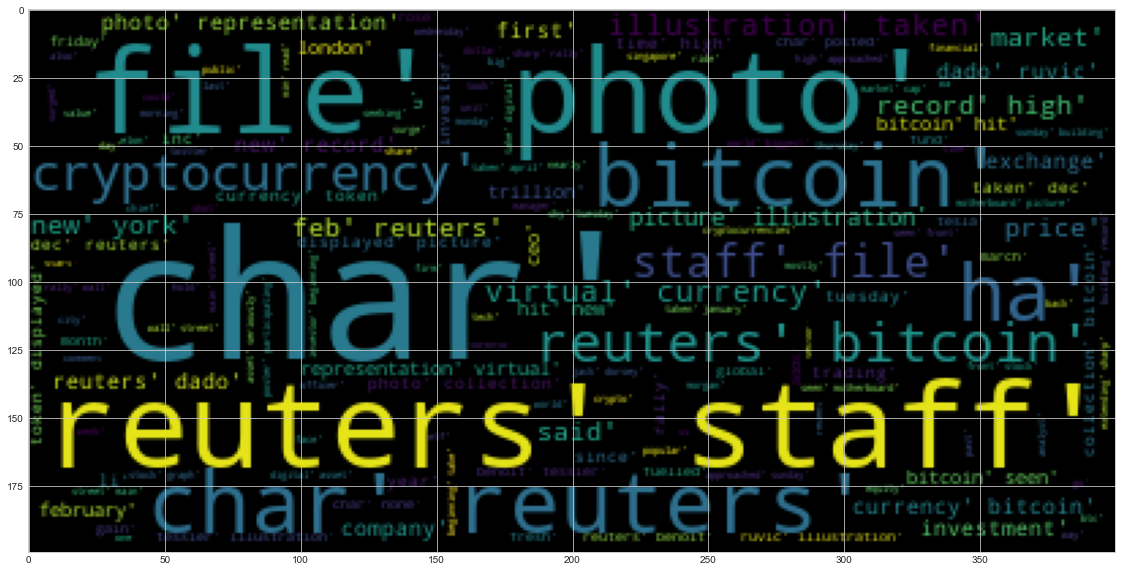

In [23]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_cloud = WordCloud().generate(str(bitcoin_tokens))
plt.imshow(bitcoin_cloud)

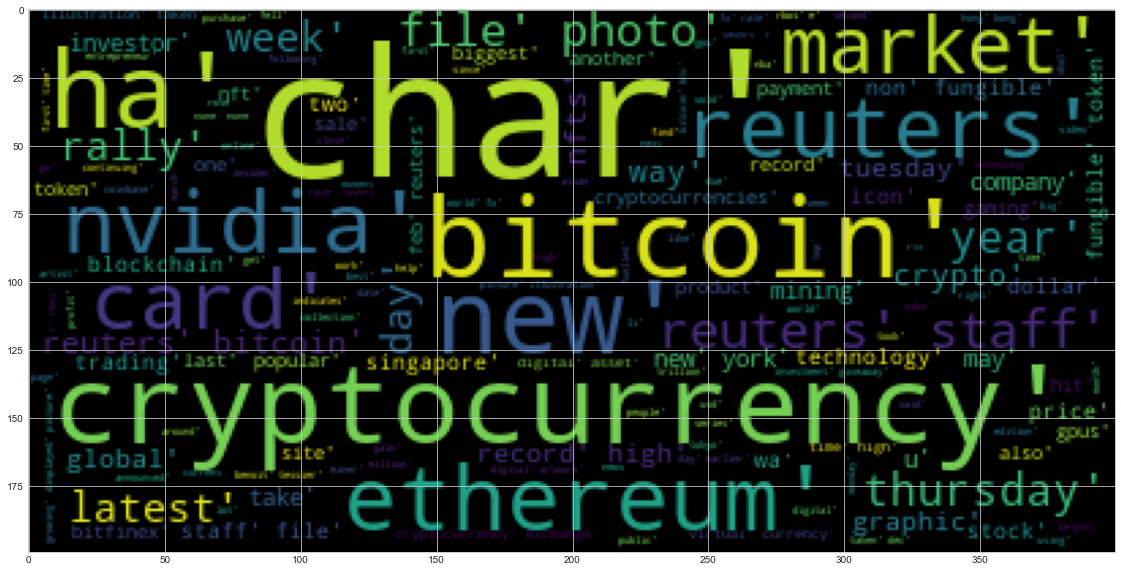

In [24]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_cloud = WordCloud().generate(str(eth_tokens))
plt.imshow(eth_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [38]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
def text_cleaner(text):
    """Tokenizes text."""
    joined = ""
    for article in text['articles']: 
        clean_text = regex.sub("", str(article['content']))
        
        joined = joined + str(clean_text)

    return joined
        
    

In [39]:
bitcoin_joined = text_cleaner(bitcoin_headlines)
bitcoin_joined

'Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India Dorsey said FridayThe duo is putting  bitcoin which is   charsWhen Bitcoin first appeared out of digital thin air it was hailed as having the potential to upend the way people spent money But more than a decade later cryptocurrency is still only trickling in  charsNoneSome things are best left a mystery at least as far as Coinbase is concernedThe San Franciscobased cryptocurrency exchange has been preparing to go public since last year and in a Thursday pros  charsNoneBitcoin is the future again this morning it hit an alltime high value of over  Is there a lesson in here Are Elon Musks tweets a good investment strategy Should we get in on this We ha  charsMiamis mayor Francis Suarez is champing at the bit to rebrand his city as a haven for tech entrepreneurs and the tax dollars that come in their wake His latest branding effort involves a push to m  c

In [43]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(bitcoin_joined)
for ent in doc.ents: 
    print(ent.text, ent.label_)
# Add a title to the document
# YOUR CODE HERE!

Twitter PRODUCT
Square PERSON
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India Dorsey ORG
FridayThe ORG
Bitcoin PERSON
first ORDINAL
more than a decade later DATE
Coinbase NORP
last year DATE
Thursday DATE
this morning TIME
Francis Suarez PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AIgenerated PERSON
Daily Crunch WORK_OF_ART
February DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
charsNew York GPE
CNN ORG
BusinessBitcoins ORG
Sunday DATE
Tuesday DATE
million CARDINAL
charsThis morning TIME
Coinbase WORK_OF_ART
American NORP
Elon Musk PERSON
Binance GPE
Changp GPE
Wednesday DATE
Reuters ORG
Reuters ORG
Bitcoin PERSON
January DATE
Reuters ORG
StaffFeb PRODUCT
Reuters ORG
Bitcoin ORG
Sunday DATE
twomonth ORDINAL
FridayThe ORG
Reuters ORG
Pristina Kosovo EVENT
June DATE
HONG KONG ORG
Reuters Breakingviews PERSON
Concise ORG
Covid eraSUPPLYSID   PERSON
CNW ORG
EvolveFunds Group IncEvolveis ORG
North American NORP
Friday DATE
one CARDINAL
Tuesday DATE
morning TIM

In [44]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc , style = 'ent')

In [73]:
# List all Entities
# YOUR CODE HERE!
entities_2 = []
for ent in doc.ents:
    if ent.label_ not in entities_2: 
        entities_2.append(ent.label_)
print(entities_2)


['PRODUCT', 'PERSON', 'LOC', 'ORG', 'ORDINAL', 'DATE', 'NORP', 'TIME', 'WORK_OF_ART', 'GPE', 'CARDINAL', 'EVENT', 'MONEY', 'FAC']


---

### Ethereum NER

In [49]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_joined = text_cleaner(eth_headlines)

In [50]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_2 = nlp(eth_joined)

for ent in doc_2.ents: 
    print(ent.text , ent.label_)

# Add a title to the document
# YOUR CODE HERE!

GeForce ORG
GPU ORG
charsNFTs PERSON
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
charsNFTs PERSON
Ethereum ORG
Christies ORG
NFT ORG
a few days DATE
one CARDINAL
Chris Torres PERSON
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
YORK Reuters PERSON
second ORDINAL
Thursday DATE
YORK Feb PERSON
Reuters ORG
second ORDINAL
Thursday DATE
the week ending st DATE
February DATE
the previous week DATE
the week DATE
Coinbase NORP
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
Reuters ORG
Reuters ORG
Asian NORP
Saturday DATE
twomonth ORDINAL
Ethereum ORG
Graphic World FX ORG
Kevin Buckland PERSON
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March DATE
REUTERSBobby YipHONG KONG Reuters ORG
Hong Ko PERSON
Reuters ORG
StaffSINGAPORE PRODUCT
Reuters ORG
Cryptocurrencies ORG
Asian NORP
Monday DATE
more than a year ago DATE
Ethereum ORG
Reuters ORG
Reuters ORG
Romanian NORP
this month DATE
Reuters ORG
PhotoSINGAPOR PRODUCT
Reuters ORG
StaffSINGAPORE PRODUCT
Reuters ORG
Asia 

In [51]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_2, style = 'ent')

In [71]:
# List all Entities
# YOUR CODE HERE!
entities = []
for ent in doc_2.ents:
    if ent.label_ not in entities: 
        entities.append(ent.label_)
print(entities)


['ORG', 'PERSON', 'DATE', 'CARDINAL', 'TIME', 'ORDINAL', 'NORP', 'GPE', 'PRODUCT', 'LOC', 'WORK_OF_ART', 'FAC']


---